# Primeras redes neuronal historicas
## La neurona de McCulloch-Pitts

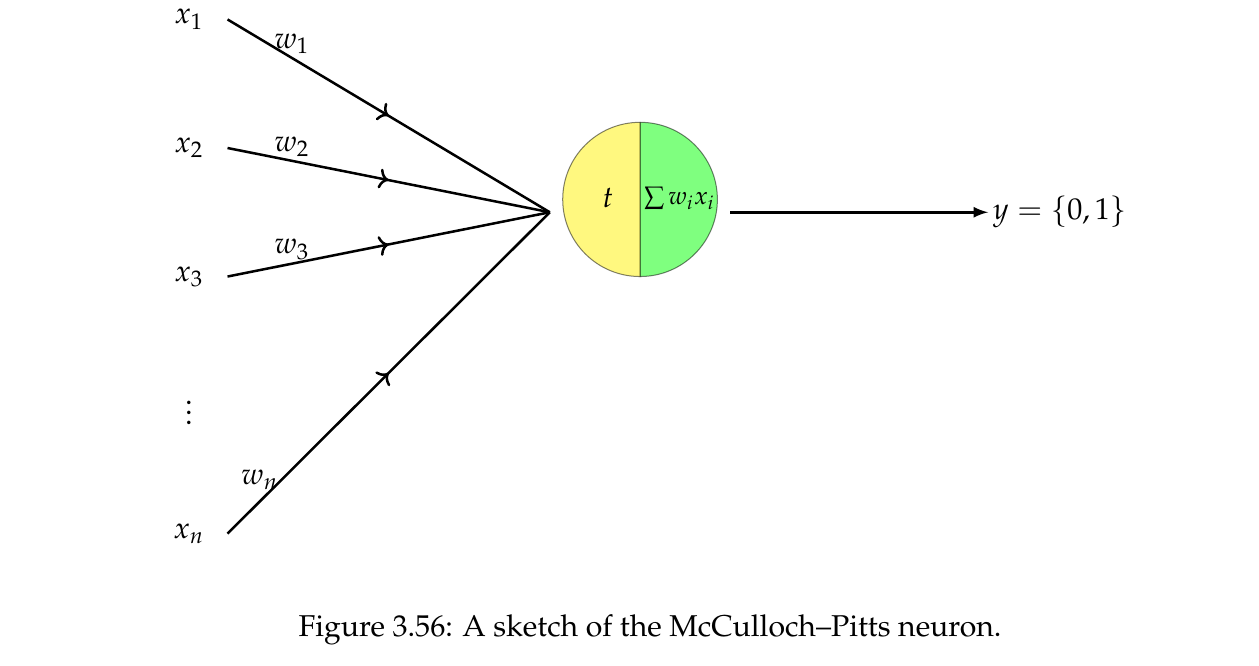

## Redes neuronales logicas.
En la red del dibujo $t$ es el umbral (threshold) y
el resultado binario es 1 o 0  de acuerdo a

\begin{eqnarray}
\left \{
    \begin{array}{cc}
        1 & \text{ si } \sum_i w_i x_i \ge t \\
        0 & \text{ si } \sum_i w_i x_i < t
    \end{array}
    \right .
\end{eqnarray}

Vamos a estudira (MacCulloh and Pitts hicieron).
Las redes logicas:

* "or"  (o)
* "and" (y)
* "nor"
* "xor" (este es imposible de representar con una capa.

## Operador logico "or"
| $x_1 $ | $ x_2 $ | $$\sum x_i= x_1 + x_2 $$ | $\ge \text{umbral} $ | $ x_1 \text{  or  } x_2 $ |
|---|---|:------:|-----|:------:|
| 1 | 1 | 2 |  1 | 1 |
| 1 | 0 | 1 |  1 | 1 |
| 0 | 1 | 1 |  1 | 1 |
| 0 | 0 | 0 |  1 | 0 |


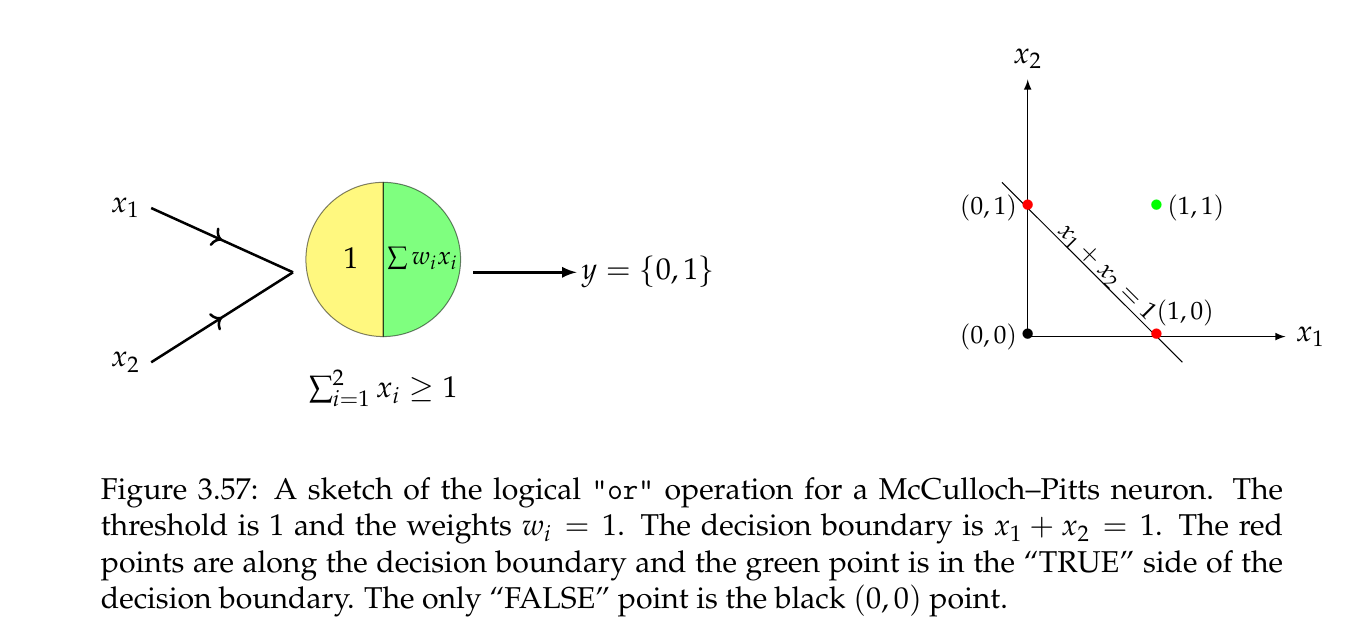

## Operador logico "and" (y) $^$
| $x_1 $ | $ x_2 $ | $$\sum x_i= x_1 + x_2 $$ | $\ge \text{umbral} $ | $ x_1 \text{  and  } x_2 $ |
|---|---|:------:|-----|:------:|
| 1 | 1 | 2 |  2 | 1 |
| 1 | 0 | 1 |  2 | 0 |
| 0 | 1 | 1 |  2 | 0 |
| 0 | 0 | 0 |  2 | 0 |





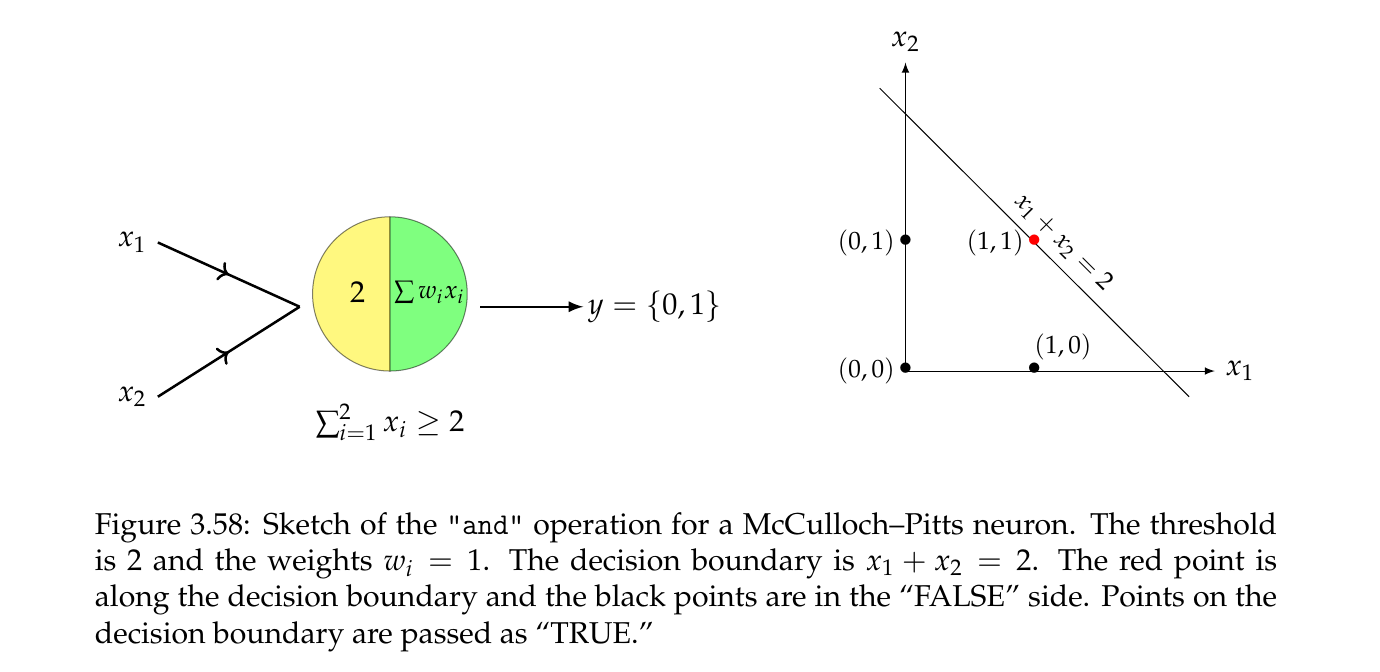

## Operador nor (ni lo uno, ni lo otro) no $x_1$ y no  $x_2$
Los pesos son -1

| $x_1 $ | $ x_2 $ | $$\sum x_i= -x_1 - x_2 $$ | $\ge \text{umbral} $ | $ x_1 \text{  nor  } x_2 $ |
|---|---|:------:|-----|:------:|
| 1 | 1 | -2 |  0 | 0 |
| 1 | 0 | -1 |  0 | 0 |
| 0 | 1 | -1 |  0 | 0 |
| 0 | 0 | 0 |  0 | 1 |

## XOR:
O exclusivo. Es verdad solo si uno los dos es verdad.

| $x_1 $ | $ x_2 $ | $$\sum x_i= x_1 + x_2 $$ | $\ge \text{umbral} $ | $ x_1 \text{  xor  } x_2 $ |
|---|---|:------:|-----|:------:|
| 1 | 1 | 2 |  ? | 0 |
| 1 | 0 | 1 |  ? | 1 |
| 0 | 1 | 1 |  ? | 1 |
| 0 | 0 | 0 |  ? | 0 |

Es **imposible** encontrar un umbral para este problema.

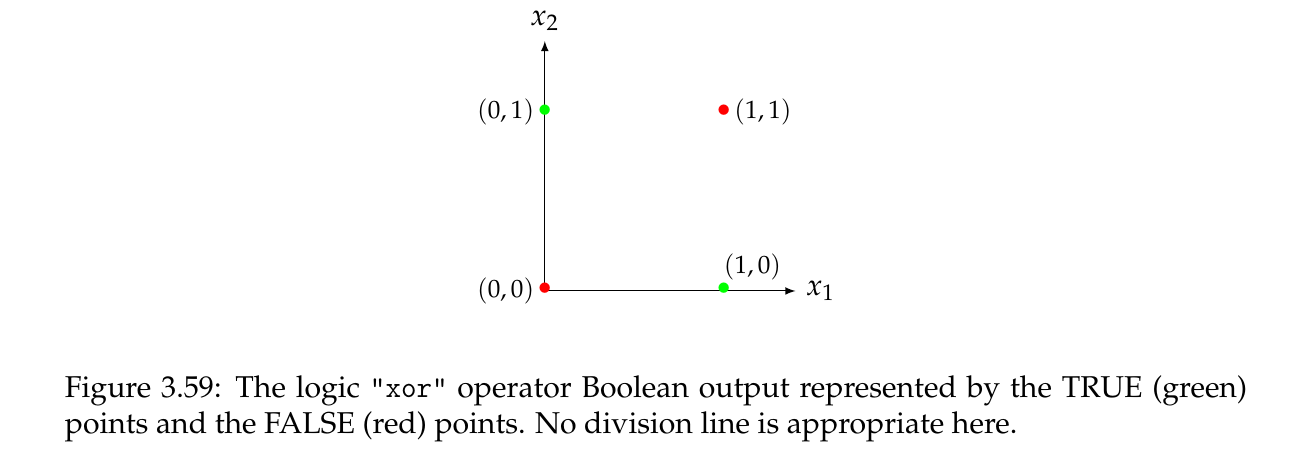

## Funciones de activacion
Las funciones de activacion son importantes para modelar cosas que no sean lineales. Mediante ellas se puede probar el teorema de universalidad  (una red neuronal puede simular cualquier funcion $f:\mathbb{R}^m \to \mathbb{R}^n$ con cualquier precision)

* **La identidad**: $I(x) = x$. No hace nada. Es como si no hubiera activacion. Puede ser util cuando la red neuronal simula una regresion lineal.

* **Heaviside**: (Step)
\begin{eqnarray}
H(t) = \left \{
    \begin{array}{cc}
    1  & \text{ si  } t \ge 0  \\
    0  & \text{ si  }  t < 0
    \end{array}
    \right .
\end{eqnarray}

* **logistic** (sigmoid)
$$S(t) = \frac{1}{1 + \mathrm{e}^{-t}} $$

* **tangente hiperbolica tanh**:

$$\tanh(t) = \frac{\sinh t }{\cosh t} = \frac{\mathrm{e}^{t} - \mathrm{e}^{-t}}{\mathrm{e}^t + \mathrm{e}^{-t}} = \frac{\mathrm{e}^{2 t}  - 1 }{\mathrm{e}^{2t} + 1} = \frac{2}{\mathrm{e}^{-2t} + 1} = 1 - \frac{2}{e^{2 t} + 1} $$

* **ReLU**: Rectified Linear Unit
\begin{eqnarray}
\text{ReLU}(t) = \max \{ 0 , t \} =
\begin{cases}
t  \quad  \quad \text{si   } t > 0 \\
0 \quad \quad \text{de lo contrario}
\end{cases}
\end{eqnarray}




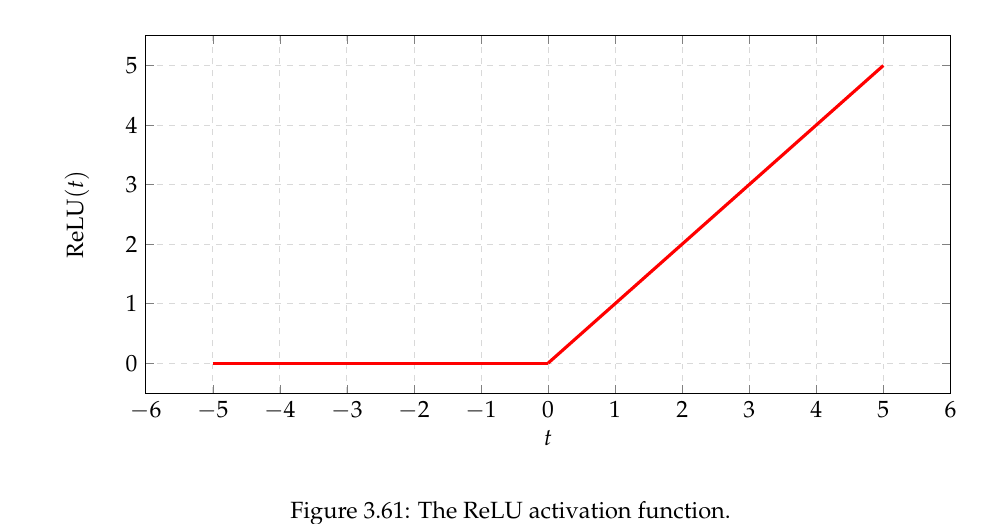

* **Leaky ReLU**

\begin{eqnarray}
\text{Leaky ReLU}(t) =
\begin{cases}
a t \quad \quad t < 0 \\
t \quad \quad t \ge 0
\end{cases}
\end{eqnarray}
donde $a>0$ es pequenho. Si $a=1$ es la identidad.

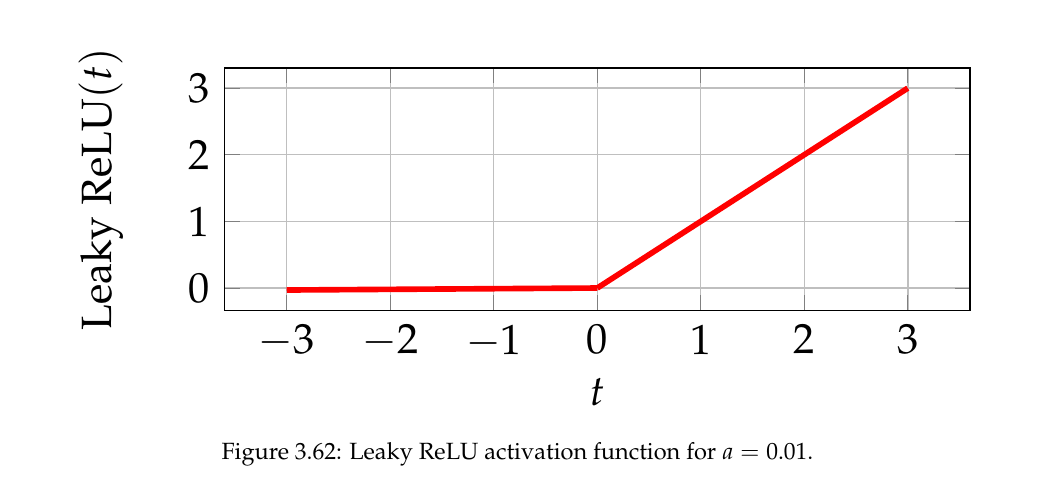

* **Elu** Exponential linear unit
\begin{eqnarray}
\text{Elu}(t) = \left \{
    \begin{array}{cc}
    \alpha( \mathrm{e}^t - 1) & \text{si  } t < 0 \\
    t  & \text{si  } t \ge 0 \\
    \end{array}
    \right .
\end{eqnarray}

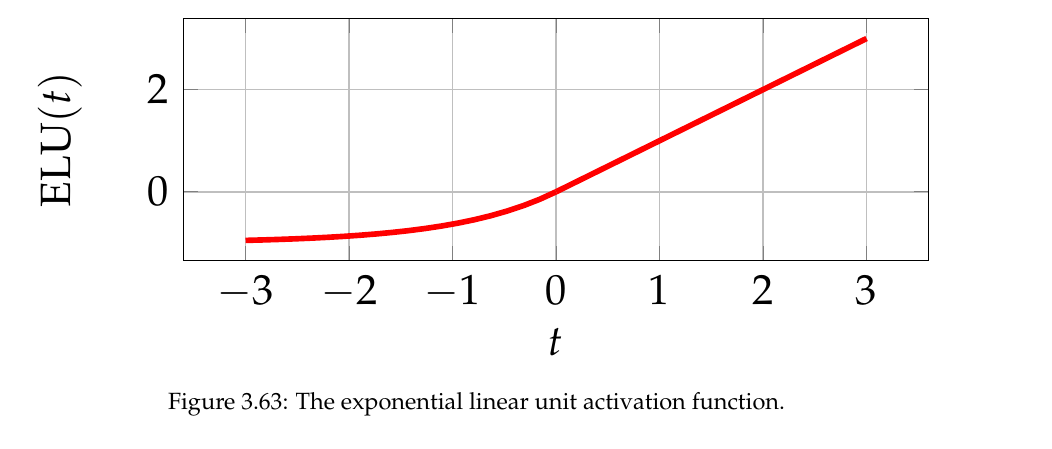

## Forward Propagation (propagacion hacia adelante)
Para explicar como se propaga la informacion en una red neuronal voy a hacer un esquema "bottom-up" (de abajo hacia arriba).

Algo como.
* un nodo de entrada, un nodo de salida
* varios nodos  de entrada, un nodo de salida
* varios nodos  de entrada, varios  nodos de salida

La figura siguiente muestra una red neuronal tipica llamada
**MLP: Multilayer Perceptron** con
* una capa de entrada
* una capa oculta
* una capa de salida
Pueden haber muchas capas ocultas pero no tantas, por que si son muchas estamos hablando de Deep Learning.

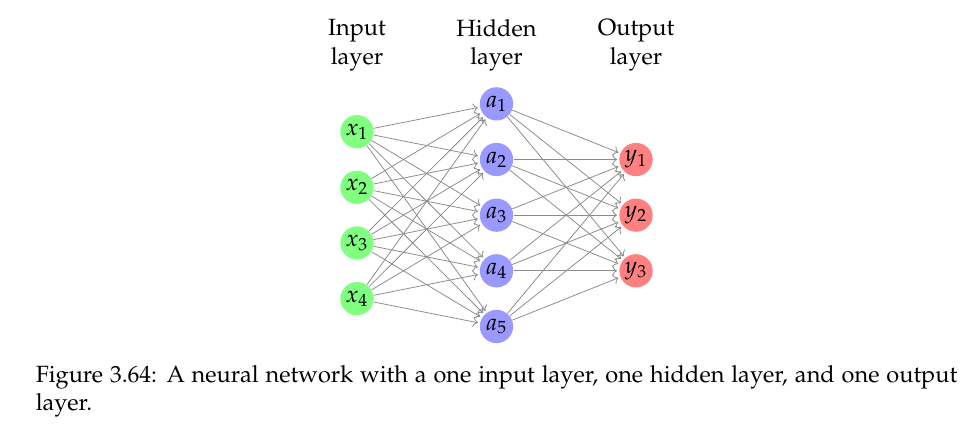

### Un nodo de entrada, uno oculto y uno de salida.


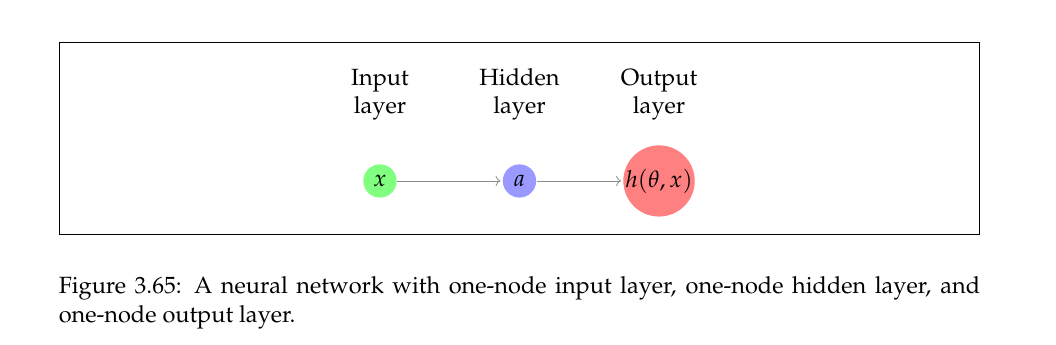

#### Como se propaga la informacion.
* $x$ es el dato de entrada (escalar)
* Para llegar al centro se necesita pesar con $\theta$. Matematicamente

$$ z^{(2)} = x \theta^{(1)}$$
* Debemos **activar** este valor. Por ejemplo, si la funcion de activacion es una logistic sigmoid

$$a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}}. $$

* pesamos la activacion con $\theta^{(2)}$ es decir,
$z^{(3)} = a^{(2)} \theta^{(2)}$

* Finalmente la ultima activacion es la hipotesis.
Podemos escribir

$$a^{(3)} = h(\theta, x) = S(z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

### Varios nodos de entrada, un nodo oculto , un nodo de salida.

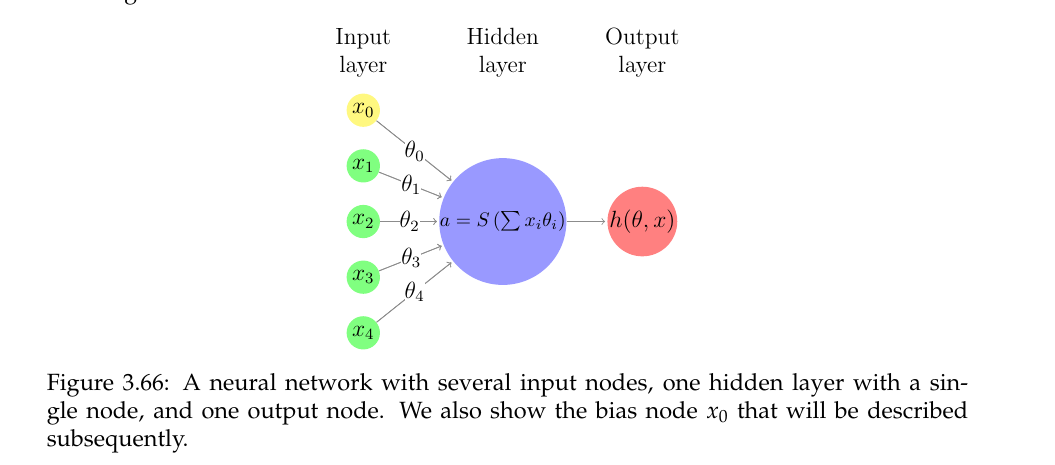

La matematica de este modelo es como sigue.

* Los verdes son los datos de entrada. El amarillo es el "bias" (intercepto). Es necesario. La columna de unos en la matriz

* los pesos ($\theta_i$) se multiplican por los datos (producto interno, o producto punto).
$$z^{(2)} = \sum_{i=0}^n x_i \theta_i $$
En el ejemplo de arriba
$$z^{(2)} = x_0 \theta_0 + x_1 \theta_1 + x_2 \theta_2 + x_3 \theta_3 + x_4 \theta_4 $$

Observe que podemos escribir

$$z^{(2)} = \sum_{j=0}^n x_j \theta_j = x^T \Theta $$
* Para llegar a la capa del medio necesitamos **activar** a $z^{(2)}$. Es decir


$$a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$

* Antes de llegar a la tercera aplicamos linealidad.

$$z^{(3)} = a^{(2)} \theta^{(2)} $$

* Finalmente en la salida
$$a^{(3)} = h(\theta, x) = S(z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

#### Varios nodos de entrada, varios ocultos, y uno de salida



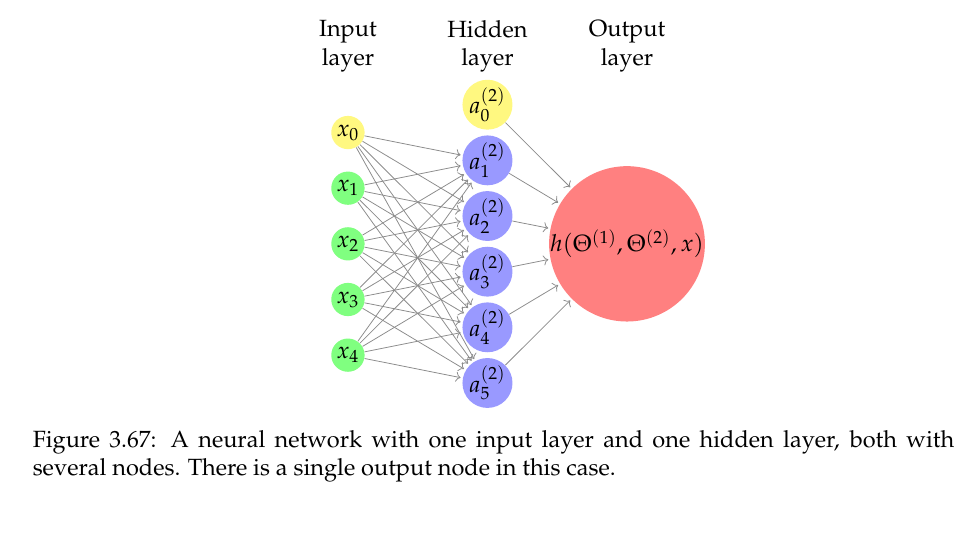

El proceso es similar

* Los datos de entrada (verdes) el bias (amarillo)
* Toca pesar los datos de entrada con los pesos correspondientes asi

$$ z_1^{(2)} =  \sum_{j=0}^n x_j \Theta_{j1}^{(1)}$$
$$ z_2^{(2)} =  \sum_{j=0}^n x_j \Theta_{j2}^{(1)}$$
$$ \vdots $$
$$ z_5^{(2)} =  \sum_{j=0}^n x_j \Theta_{j5}^{(1)}$$

En general

$$z_i^{(2)} (\theta, x) = \sum_{j=0}^n x_j \theta_{ji}^{(1)} $$

Esto se puede escribir como un bloque

$$z^{(2)} = x^T \Theta^{(1)} $$

* Activacion. Lo hace punto a punto

$$a_i^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}} \quad , \quad i=1,2, \cdots, p $$

* Hacia la capa de salida. La parte lineal

$$z^{(3)} = \sum_{j=0}^p a_j^{(2)} \theta_j^{(2)} $$

* Finalmente la salida
$$a^{(3)} = h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

# Proxima clase:
* multinodos en entrada, ocultos y salida.